### Problem Statement: 

A marketing team sends promotional messages to customers. Whenever the customers receive the promotional message, their reactions vary vastly. For every customer’s reaction, the marketing team gets a reward. You are given a set of data from which you have to find the highest rewarding message.

### Import libraries

In [0]:
import math
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [0]:
df = pd.read_csv('dataset.csv')
df.head()

,Customer,sms_1,sms_2,sms_3,sms_4
0,0,-1.821934,30.279602,-1.559028,10.263097
1,1,-7.500928,-16.679482,8.828892,9.864468
2,2,5.155905,9.479978,-13.675668,16.748901
3,3,-4.965035,-9.268252,10.731794,8.831545
4,4,0.691929,-28.573982,7.394661,9.941408


### Visualize the average reward for each message

Text(0.5, 1.0, 'Distribution of Rewards by Message')

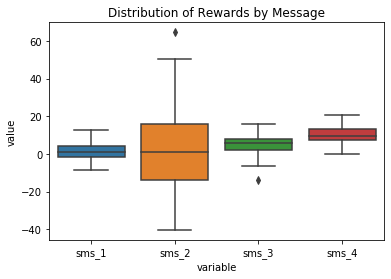

In [0]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['sms_1','sms_2','sms_3','sms_4']]))
plt.title("Distribution of Rewards by Message")

### Initialize variables to implement UCB method

In [0]:
#Initialize Variables
N = len(df.index)       # the time (or round) 
d = 4                   # number of possible messages
Qt_a = 0
Nt_a = np.zeros(d)      #number of times action a has been selected prior to T
                        #If Nt(a) = 0, then a is considered to be a maximizing action.
c = 1                   #a number greater than 0 that controls the degree of exploration

sum_rewards = np.zeros(d) #cumulative sum of reward for a particular message

#helper variables to perform analysis
hist_t = [] #holds the natural log of each round
hist_achieved_rewards = [] #holds the history of the UCB CHOSEN cumulative rewards
hist_best_possible_rewards = [] #holds the history of OPTIMAL cumulative rewards
hist_random_choice_rewards = [] #holds the history of RANDONMLY selected actions rewards

### Implement UCB method 

In [0]:
#loop through no of rounds #t = time
for t in range(0,N):
    UCB_Values = np.zeros(d) #array holding the ucb values. Pick the max  
    action_selected = 0
    for a in range(0, d):
        if (Nt_a[a] > 0):
            ln_t = math.log(t) #natural log of t
            hist_t.append(ln_t) #to plot natural log of t

            #calculate the UCB
            Qt_a = sum_rewards[a]/Nt_a[a]
            ucb_value = Qt_a + c*(ln_t/Nt_a[a]) 
            UCB_Values[a] = ucb_value

        #if this equals zero, choose as the maximum. Cant divide by negative     
        elif (Nt_a[a] == 0):
            UCB_Values[a] = 1e500 #make large value
        
    #select the max UCB value
    action_selected = np.argmax(UCB_Values)

    #update Values as of round t
    Nt_a[action_selected] += 1
    reward = df.values[t, action_selected+1]
    sum_rewards[action_selected] += reward

### Check the reward by choosing a message after each round randomly and using UCB algorithm

In [0]:
#these are to allow us to perform analysis of our algorithmm
r_ = df.values[t,[1,2,3,4]]     #get all rewards for time t to a vector
r_best = r_[np.argmax(r_)]      #select the best action
    
pick_random = random.randrange(d) #choose an action randomly
r_random = r_[pick_random] #np.random.choice(r_) #select reward for random action

if len(hist_achieved_rewards)>0:
    hist_achieved_rewards.append(hist_achieved_rewards[-1]+reward)
    hist_best_possible_rewards.append(hist_best_possible_rewards[-1]+r_best)
    hist_random_choice_rewards.append(hist_random_choice_rewards[-1]+r_random)
else:
    hist_achieved_rewards.append(reward)
    hist_best_possible_rewards.append(r_best)
    hist_random_choice_rewards.append(r_random)

In [0]:
print("Reward if choosen randonmly {0}".format(hist_random_choice_rewards[-1]))
print("Reward of UCB method {0}".format(hist_achieved_rewards[-1]))

Reward if choosen randonmly 1.9912285189524608
Reward of UCB method 1.9912285189524608


<b>Note</b>: `As the reward is chosen randomly, sometime it can give a higher value than UCB. In such case rerun the code. The aim is to show how to get constant safe reward using UCB.`

Variable `Nt_a`, holds the number of times each action was selected.<br>

From the boxplot visualization shown above you know that `sms_4` messages gives the highest reward.<br>

Plot each action and the number of times each action was selected.

Text(0.5, 1.0, 'Number of times each Message was Selected')

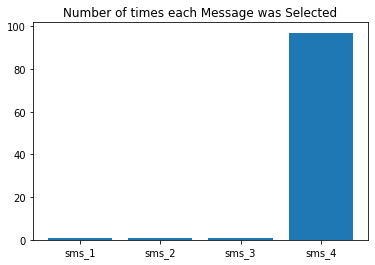

In [0]:
plt.bar(['sms_1','sms_2','sms_3','sms_4'],Nt_a)
plt.title("Number of times each Message was Selected")